- title: RDKit 入门：文件的导入与导出
- slug: rdkit-import-export-file
- date: 2022-10-18
- tags: RDKit, Python
- summary: 介绍一些 RDKit 的基本操作，包括简单地创建分子、从外部文件中导入分子以及导出分子为外部文件。

## 单个分子的导入与导出

In [68]:
import pickle
from rdkit import Chem

### SMILES

#### 使用 SMILES 导入分子

所有读取分子的函数都返回 `rdkit.Chem.rdchem.Mol` 对象，若读取失败，则反回 `None`。

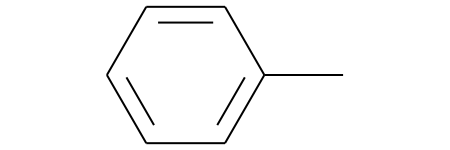

In [69]:
m = Chem.MolFromSmiles('Cc1ccccc1')
m

#### 导出为 SMILES

使用 `Chem.MolToSmiles(mol, parameters)` 可以将对象 `mol` 转换为 SMILES 字符串，可选参数包括

- `isomericSmiles=True`：是否区分同分异构体
- `kekuleSmiles=False`：是否以 Kekule 式输出
- `rootedAtAtom=-1`：非负时以指定的原子作为起始点
- `canonical=True`：是否以标准 SMILES 输出
- `allBondsExplicit=False`：是否表示出各个键
- `allHsExplicit=False`：是否表示出各个氢原子

In [70]:
print("%-15s" % "SMILES: ", Chem.MolToSmiles(m))
print("%-15s" % "Kekule: ", Chem.MolToSmiles(m, kekuleSmiles=True))
print("%-15s" % "Rooted atiom: ", Chem.MolToSmiles(m, rootedAtAtom=2))
print("%-15s" % "Non canonical: ", Chem.MolToSmiles(m, canonical=False))
print("%-15s" % "All bonds: ", Chem.MolToSmiles(m, allBondsExplicit=True))
print("%-15s" % "All H: ", Chem.MolToSmiles(m, allHsExplicit=True))

SMILES:         Cc1ccccc1
Kekule:         CC1=CC=CC=C1
Rooted atiom:   c1ccccc1C
Non canonical:  Cc1ccccc1
All bonds:      C-c1:c:c:c:c:c:1
All H:          [CH3][c]1[cH][cH][cH][cH][cH]1


### .pkl 格式

#### 转换为二进制并导出

`pickle.dump()`：将对象以二进制形式存储

In [71]:
binary_m = m.ToBinary()

with open("./binary_m.pkl", "wb") as f:
    pickle.dump(m, f)

binary_m

b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x07\x00\x00\x00\x07\x00\x00\x00\x80\x01\x06\x00`\x00\x00\x00\x01\x03\x06@(\x00\x00\x00\x03\x04\x06@h\x00\x00\x00\x03\x03\x01\x06@h\x00\x00\x00\x03\x03\x01\x06@h\x00\x00\x00\x03\x03\x01\x06@h\x00\x00\x00\x03\x03\x01\x06@h\x00\x00\x00\x03\x03\x01\x0b\x00\x01\x00\x01\x02h\x0c\x02\x03h\x0c\x03\x04h\x0c\x04\x05h\x0c\x05\x06h\x0c\x06\x01h\x0c\x14\x01\x06\x01\x06\x05\x04\x03\x02\x17\x04\x00\x00\x00\x00\x00\x00\x00\x16'

#### 从二进制导入分子

- `Chem.mol()`：将二进制字符串转为分子
- `pickle.load()`：读取 `.pkl` 文件中存储的对象

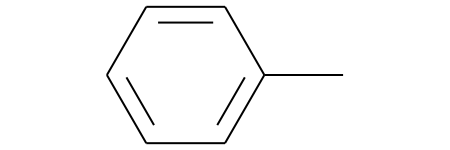

In [72]:
m = Chem.Mol(binary_m)
m

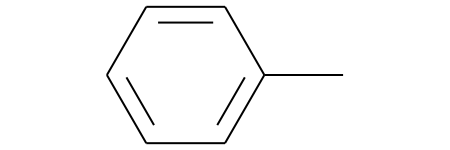

In [73]:
with open("./binary_m.pkl", "rb") as f:
    binary_m = f.read()

m = pickle.loads(binary_m)
m

### .mol 格式

`Chem.MolToMolBlock(mol)`：输出分子的 `.mol` 信息
`Chem.MolToMolFile(mol, filename)`：导出分子的 `.mol` 文件

In [74]:
print(Chem.MolToMolBlock(m))


     RDKit          2D

  7  7  0  0  0  0  0  0  0  0999 V2000
    3.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  2  0
  3  4  1  0
  4  5  2  0
  5  6  1  0
  6  7  2  0
  7  2  1  0
M  END



`.mol` 格式便于在其中添加信息，导入其他软件。此外，在生成 `.mol` 文件时会自动生成原子的坐标，避免导入其他软件时因为立体化学而出现问题。

In [75]:
m.SetProp("_Name", "Toluene")
print(Chem.MolToMolBlock(m))

Toluene
     RDKit          2D

  7  7  0  0  0  0  0  0  0  0999 V2000
    3.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  2  0
  3  4  1  0
  4  5  2  0
  5  6  1  0
  6  7  2  0
  7  2  1  0
M  END



## 分子集的导入与导出

### SMILES

#### 导出 SMILES 分子集

首先用 SMILES 创建多个分子并保存在列表中，作为分子集。

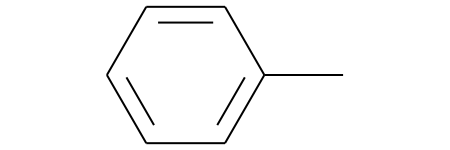

In [76]:
mols_smiles = [ "Cc1ccccc1", "C1CCCCC1", "c1cocc1"]
mols = [Chem.MolFromSmiles(mol) for mol in mols_smiles]
mols[0]

分子集（化合物库）的主流保存格式是 `.smi` 与 `.sdf`，其中 `.smi` 直接保存了化合物的 SMILES 与名字，格式也十分简单，首行为标题，后续每行保存一个 SMILES，空格后为化合物名称，也可使用制表符作为分隔符，格式比较自由：

```
SMILES Name
Cc1ccccc1 Toluene
C1CCCCC1 molecule2
c1cocc1 molecule3
{SIMLES} {name}
```

RDKit 没有提供导出为 `.smi` 文件的函数，那么就需要根据自己的要求来生成。

In [77]:
mols[0].SetProp("_Name", "Toluene")

with open("./mols.smi", "w") as f:
    title = " ".join(["SMILES", "Name\n"])
    f.write(title)
    for mol in mols:
        try:
            name = "".join([mol.GetProp("_Name"), "\n"])
        except KeyError:
            name = "\n"
        line = " ".join([Chem.MolToSmiles(mol), name])
        f.write(line)

#### 导入 SMILES 分子集

`Chem.SmilesMolSupplier(filename, delimiter, smilesColumn, nameColumn, titleLine, sanitize)` 提供了读取 `.smi` 文件的快捷方法，返回一个可迭代对象。

- `filename`：读取的文件路径
- `delimiter=' '`：分隔符
- `smilesColumn=0`：SMILES 所在列的索引
- `nameColumn=1`：SMILES 对应名称所在列的索引
- `titleLine=True`：是否有标题行
- `sanitize=True`：是否检查 SMILES 数据正确性

Toluene


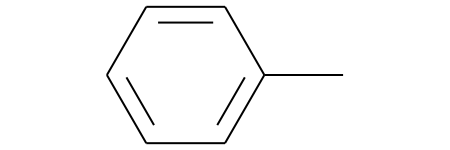

In [80]:
mols_read = Chem.SmilesMolSupplier("./mols.smi")
print(mols_read[0].GetProp("_Name"))
mols_read[0]

### .sdf 格式

#### 导出为 .sdf 分子集

`.sdf` 是更为常用的分子集存储格式，可以使用 `Chem.SDWriter()` 导出文件。

In [79]:
with Chem.SDWriter("./mols.sdf") as f:
    for mol in mols:
        f.write(mol)

`.sdf` 文件保存的数据更为详细，文件中使用 `$$$$` 分隔不同分子：

```
Toluene
     RDKit          2D

  7  7  0  0  0  0  0  0  0  0999 V2000
    3.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  2  0
  3  4  1  0
  4  5  2  0
  5  6  1  0
  6  7  2  0
  7  2  1  0
M  END
$$$$

     RDKit          2D

  6  6  0  0  0  0  0  0  0  0999 V2000
    1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
  3  4  1  0
  4  5  1  0
  5  6  1  0
  6  1  1  0
M  END
$$$$

     RDKit          2D

  5  5  0  0  0  0  0  0  0  0999 V2000
    1.2760    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.3943    1.2135    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0323    0.7500    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0323   -0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.3943   -1.2135    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  2  0
  2  3  1  0
  3  4  1  0
  4  5  2  0
  5  1  1  0
M  END
$$$$
```

#### 从 .sdf 导入分子集

与导入 `.smi` 文件相似，导入 `.sdf` 文件也有 `Chem.SDMolSupplier()` 函数，使用方法也类似。

Toluene


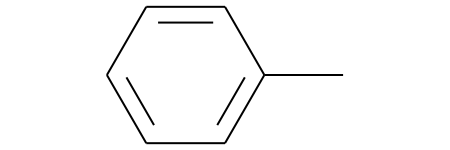

In [81]:
mols_read = Chem.SDMolSupplier("./mols.sdf")
print(mols_read[0].GetProp("_Name"))
mols_read[0]
